# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [4]:
df_a['y_pred']=[0 if i<0.5 else 1 for i in df_a['proba']]

In [6]:
TP=0
TN=0
FN=0
FP=0
for i,j in zip(df_a['y'],df_a['y_pred']):
    if i==j==1:
        TP+=1
    elif i==j==0:
        TN+=1
    elif i==1 and j==0:
        FN+=1
    elif i==0 and j==1:
        FP+=1

confusion_matrix=[[TP,FP],[FN,TN]]
print("Confusion matrix:",confusion_matrix)

Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1_Score=(2*(Precision*Recall))/(Precision+Recall)

print("Precision:",Precision)
print("Recall:",Recall)
print("F1_Score:",F1_Score)

accuracy=(TP+TN)/(TP+FP+TN+FN)
print("Accuracy Score:",accuracy)

Confusion matrix: [[10000, 100], [0, 0]]
Precision: 0.9900990099009901
Recall: 1.0
F1_Score: 0.9950248756218906
Accuracy Score: 0.9900990099009901


In [7]:
unique_prob=list(set(df_a['proba']))
unique_prob.sort(reverse=True)

In [8]:
df_a.y.sum()

10000.0

In [9]:
len(df_a)

10100

In [10]:
len(unique_prob)

10100

In [27]:
tpr_list = list()
fpr_list = list()
print('Total number of unique thresholds: {}'.format(len(unique_prob)))
for _, roc_thresh in enumerate(unique_prob):
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    if _%100==0:
        print('Calculating TPR and FPR for the threshold index: {}'.format(_) )
    for idx, row in df_a.iterrows():
        row_dict = row.to_dict()

        y_pred = 1 if row_dict['proba'] >= roc_thresh else 0
        y_actual = row_dict['y']
        
        if y_actual==y_pred==1:
            TP+=1
        elif y_actual==y_pred==0:
            TN+=1
        elif y_actual==1 and y_pred==0:
            FN+=1
        elif y_actual==0 and y_pred==1:
            FP+=1 
            
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

Total number of unique thresholds: 10100
Calculating TPR and FPR for the threshold index: 0
Calculating TPR and FPR for the threshold index: 100
Calculating TPR and FPR for the threshold index: 200
Calculating TPR and FPR for the threshold index: 300
Calculating TPR and FPR for the threshold index: 400
Calculating TPR and FPR for the threshold index: 500
Calculating TPR and FPR for the threshold index: 600
Calculating TPR and FPR for the threshold index: 700


KeyboardInterrupt: 

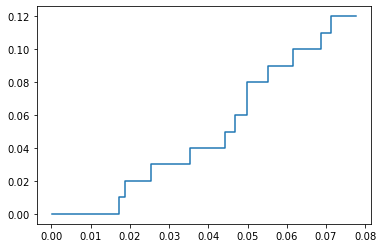

In [28]:
plt.plot(tpr_list, fpr_list)

I stopped the loop while it was in progress as it was taking too much time, so the values are partial

In [29]:
pAUC = np.trapz(tpr_list, fpr_list)

In [30]:
pAUC

0.005443

As all the probabilities are unique, it's looping through all of them and the time complexity is becoming n^2 where n is length of the dataset.

To make it efficient, we can round off the probability scores to some significant bits which would increase number of duplicate probabilities and the execution could be somewhat faster.

In [31]:
unique_prob_rounded_off=list(set(df_a['proba'].apply(lambda x: round(x, 3))))
unique_prob_rounded_off.sort(reverse=True)
unique_prob_rounded_off[0:5]

[0.9, 0.899, 0.898, 0.897, 0.896]

In [32]:
len(unique_prob_rounded_off)

401

In [33]:
tpr_list = list()
fpr_list = list()
print('Total number of unique thresholds: {}'.format(len(unique_prob_rounded_off)))
for _, roc_thresh in enumerate(unique_prob_rounded_off):
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    if _%100==0:
        print('Calculating TPR and FPR for the threshold index: {}'.format(_) )
    for idx, row in df_a.iterrows():
        row_dict = row.to_dict()

        y_pred = 1 if row_dict['proba'] >= roc_thresh else 0
        y_actual = row_dict['y']
        
        if y_actual==y_pred==1:
            TP+=1
        elif y_actual==y_pred==0:
            TN+=1
        elif y_actual==1 and y_pred==0:
            FN+=1
        elif y_actual==0 and y_pred==1:
            FP+=1 
            
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

Total number of unique thresholds: 401
Calculating TPR and FPR for the threshold index: 0
Calculating TPR and FPR for the threshold index: 100
Calculating TPR and FPR for the threshold index: 200
Calculating TPR and FPR for the threshold index: 300
Calculating TPR and FPR for the threshold index: 400


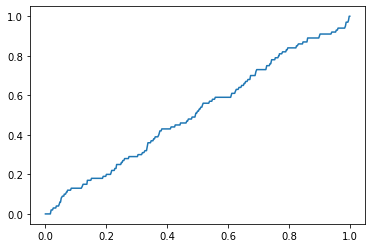

In [34]:
plt.plot(tpr_list, fpr_list)

In [35]:
pAUC = np.trapz(tpr_list, fpr_list)

In [36]:
pAUC

0.488309



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [38]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [39]:
df_b['y_pred']=[0 if i<0.5 else 1 for i in df_b['proba']]

Calculating Confusion Matrix,Precision,Recall,F1_Score

In [40]:
df_b.head()
TP=0
TN=0
FN=0
FP=0
for i,j in zip(df_b['y'],df_b['y_pred']):
    if i==j==1:
        TP+=1
    elif i==j==0:
        TN+=1
    elif i==1 and j==0:
        FN+=1
    elif i==0 and j==1:
        FP+=1

confusion_matrix_b=[[TP,FP],[FN,TN]]
print("Confusion matrix:",confusion_matrix_b)

Precision_b=TP/(TP+FP)
Recall_b=TP/(TP+FN)
F1_Score_b=(2*(Precision_b*Recall_b))/(Precision_b+Recall_b)

print("Precision:",Precision_b)
print("Recall:",Recall_b)
print("F1_Score:",F1_Score_b)

accuracy_b=(TP+TN)/(TP+FP+TN+FN)
print("Accuracy Score:",accuracy_b)

Confusion matrix: [[55, 239], [45, 9761]]
Precision: 0.1870748299319728
Recall: 0.55
F1_Score: 0.2791878172588833
Accuracy Score: 0.9718811881188119


In [41]:
unique_prob_rounded_off_b=list(set(df_b['proba'].apply(lambda x: round(x, 4))))
unique_prob_rounded_off_b.sort(reverse=True)
unique_prob_rounded_off_b[0:5]

[0.5953, 0.5948, 0.5922, 0.5902, 0.5887]

In [42]:
tpr_list_b = list()
fpr_list_b = list()
print('Total number of unique thresholds: {}'.format(len(unique_prob_rounded_off_b)))
for _, roc_thresh in enumerate(unique_prob_rounded_off_b):
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    if _%100==0:
        print('Calculating TPR and FPR for the threshold index: {}'.format(_) )
    for idx, row in df_b.iterrows():
        row_dict = row.to_dict()

        y_pred = 1 if row_dict['proba'] >= roc_thresh else 0
        y_actual = row_dict['y']
        
        if y_actual==y_pred==1:
            TP+=1
        elif y_actual==y_pred==0:
            TN+=1
        elif y_actual==1 and y_pred==0:
            FN+=1
        elif y_actual==0 and y_pred==1:
            FP+=1 
            
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    
    tpr_list_b.append(TPR)
    fpr_list_b.append(FPR)

Total number of unique thresholds: 3803
Calculating TPR and FPR for the threshold index: 0
Calculating TPR and FPR for the threshold index: 100
Calculating TPR and FPR for the threshold index: 200
Calculating TPR and FPR for the threshold index: 300
Calculating TPR and FPR for the threshold index: 400
Calculating TPR and FPR for the threshold index: 500
Calculating TPR and FPR for the threshold index: 600
Calculating TPR and FPR for the threshold index: 700
Calculating TPR and FPR for the threshold index: 800
Calculating TPR and FPR for the threshold index: 900
Calculating TPR and FPR for the threshold index: 1000
Calculating TPR and FPR for the threshold index: 1100
Calculating TPR and FPR for the threshold index: 1200
Calculating TPR and FPR for the threshold index: 1300
Calculating TPR and FPR for the threshold index: 1400
Calculating TPR and FPR for the threshold index: 1500
Calculating TPR and FPR for the threshold index: 1600
Calculating TPR and FPR for the threshold index: 1700


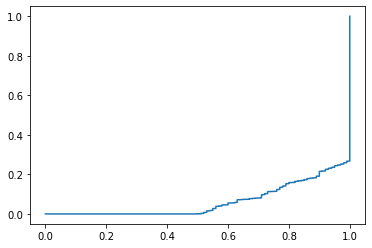

In [45]:
plt.plot(tpr_list_b, fpr_list_b)

As we can see from the above plot that our ROC curve is less than 0.5 which means it is worse than a random model and we can overcome this problem by simply switching/swapping the class labels.

In [46]:
pAUC_b = np.trapz(tpr_list_b, fpr_list_b)
pAUC_b

0.9377624999999999

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [47]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [48]:
df_c['y_pred']=[0 if i<0.5 else 1 for i in df_c['prob']]

In [49]:
unique_prob_c=list(set(df_c['prob']))
unique_prob_c.sort(reverse=True)
len(unique_prob_c)

2791

In [56]:
A = dict()
print('Total number of unique thresholds: {}'.format(len(unique_prob_c)))
for _, roc_thresh in enumerate(unique_prob_c):
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    for idx, row in df_c.iterrows():
        row_dict = row.to_dict()

        y_pred = 1 if row_dict['prob'] >= roc_thresh else 0
        y_actual = row_dict['y']
        
        if y_actual==y_pred==1:
            TP+=1
        elif y_actual==y_pred==0:
            TN+=1
        elif y_actual==1 and y_pred==0:
            FN+=1
        elif y_actual==0 and y_pred==1:
            FP+=1 
            
    a=(500*FN)+(100*FP)
    
    A[roc_thresh]=a


Total number of unique thresholds: 2791


Finding lowest value of metric A among threshold probabilities

In [57]:
min(A,key=A.get)

0.2300390278970873


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [58]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [59]:
df_d['Square_error']=((df_d['y']-df_d['pred'])**2)

In [60]:
MSE=sum(df_d['Square_error'])/len(df_d)
print("Mean Square Error is:",MSE)

Mean Square Error is: 177.16569974554707


In [61]:
df_d["Simple_error"]=abs(df_d['y']-df_d['pred'])

In [62]:
MAPE=sum(df_d["Simple_error"])/sum(df_d['y'])
print("Median Absolute Percentage Error (MAPE) is :",MAPE)

Median Absolute Percentage Error (MAPE) is : 0.1291202994009687


In [63]:
y_bar=sum(df_d["y"])/len(df_d)
SS_total=sum((x-y_bar)**2 for x in df_d['y'])
SS_residual=sum(df_d['Square_error'])
print(SS_total)
print(SS_residual)

638161080.035662
27850448.0


In [64]:
R2=1-(SS_residual/SS_total)
print("R2 error is :",R2)

R2 error is : 0.9563582786990964
